# COMP4220: Machine Learning, Spring 2021, Assignment 4
Due: Wednsday, March 24, 11pm

Please submit one pdf file for all questions.

You can type your answer for the first two questions in the below cell of each question using "Markdown" option!

****When turning in assignments after the due date, please clearly specify the number of late hours used.

# 1. What are precision and recall?

Precision is a measure of how accurate a prediction was. It can be calculated by true positives/(true positives + false positives)

Recall is a measure of how accurate a prediction was. It can be calculated by true positives/(true positives + false negatives)










# 2. Explain the use of ROC curves and the AUC of an ROC Curve.

ROC curves are used to plot the true positive rate against the false pasitive rate. It plots sensitivity versus 1- specificity.  

The AUC of an ROC curve determines how well the classifier performs. A perfect ROC classifier will have an AUC of 1, while a perfectly random classifier will have a ROC AUC of 0.5.








# 3. Programming assignment(Logistic Regression)

# This example uses two feature of the Social_Network_Ads dataset that is uploaded along with this Jupyter notebook.

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Importing the dataset

dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


# P3.1: Split the dataset into the Training set(%75) and Test set(%25) using "train_test_split" from sklearn.model_selection.


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, train_size = 0.75) #don't actually have to define test and train size as default is exactly what we want

# p3.2: Apply Feature Scaling method for X_train and X_test with "StandardScaler" from "sklearn.preprocessing"

Hint: use StandardScaler.fit_transform(X_train) for "X_train" and use StandardScaler.transform(X_test) for "X_test"

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.transform(X_test)

# p3.3: Train the logistic Regression model on the training set 


In [ ]:
from sklearn.linear_model import SGDClassifier
classifier = SGDClassifier()
classifier.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

# p3.4: Predict and show the Test set results 

In [ ]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0])

# p3.5: Make and show the Confusion Matrix and show the result

In [ ]:
from sklearn.metrics import confusion_matrix
confusionM = confusion_matrix(y_test, y_pred)
confusionM

array([[59, 12],
       [ 7, 22]])

# How do you decide which threshold to use?
First, use the cross_val_predict()function to get the scores of all instances in the training set, but this time specify that you want to return decision scores instead of predictions:

In [ ]:
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(classifier, X_train, y_train, cv=3,method="decision_function")
print(y_scores)

[ -8.09933044  -8.87377196  -3.16783942  -1.3658972    0.03928422
  -4.0923339    1.35290747   9.95059371  -3.68158976  -8.22395201
   4.63760594  -0.50371351 -17.88601835  -9.09758374  -2.23571292
   4.73679613 -12.33395476  -1.06832661 -20.00333051 -17.68763795
  18.68816556  -2.55108287  -7.61482748 -23.24351755  -6.20964606
   8.48310149  -9.69907625  -9.09758374   3.17011372 -18.46589549
   3.63935264  -6.17658266  -3.1602074    0.03928422  14.00210168
  -0.20995893  -8.35620561  13.29760296 -19.55570697   6.27804716
  -6.13970325  15.28266153  13.46291996   7.26485243   4.37691475
  -0.20995893  -2.77871065  10.4172973   -0.56220829   0.97141072
   2.83947973 -10.1174524   -7.42407911  -5.24827217  15.12116054
   5.18823569  -0.84451484 -10.67189817 -16.69320067   4.99748732
  -3.09789661   9.48135479  -6.46652123  -3.24794956   4.7914749
 -12.78539432 -12.33395476 -11.40946028   0.14992245  -7.71401768
 -15.88951175  -3.51245675 -17.59989579  -5.08677119  -5.53821074
  20.515539

# Logistic Regression Classification metrics


# p3.6: Compute the accuracy, precision, recall and f1_score and show all results

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
classifier_accuracy = accuracy_score(y_test, y_pred)
classifier_precision = precision_score(y_test, y_pred)
classifier_recall = recall_score(y_test, y_pred)
classifier_f1 = f1_score(y_test, y_pred)
print("Accuracy: ", classifier_accuracy)
print("Precision: ", classifier_precision)
print("Recall: ", classifier_recall)
print("F1: ", classifier_f1)


Accuracy:  0.81
Precision:  0.6470588235294118
Recall:  0.7586206896551724
F1:  0.6984126984126984


# p3.7: use the precision_recall_curve() function to compute precision and recall for all possible thresholds

In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_train, y_scores)
print("Precision Values: ", precision)
print("Recall Values: ",recall)
print("Threshold: ",thresholds)

Precision Values:  [0.60962567 0.60752688 0.61081081 0.61413043 0.61202186 0.61538462
 0.61878453 0.62222222 0.62011173 0.61797753 0.62146893 0.625
 0.62857143 0.63218391 0.63583815 0.63953488 0.64705882 0.65088757
 0.6547619  0.65868263 0.6626506  0.66666667 0.67073171 0.67484663
 0.67901235 0.68322981 0.68125    0.68553459 0.68987342 0.69426752
 0.69871795 0.69677419 0.7012987  0.70588235 0.71052632 0.71523179
 0.72       0.72483221 0.72297297 0.72789116 0.7260274  0.73103448
 0.73611111 0.74125874 0.74647887 0.75177305 0.75       0.75539568
 0.76642336 0.77205882 0.77037037 0.7761194  0.77443609 0.78030303
 0.78625954 0.79230769 0.79069767 0.7890625  0.78740157 0.78571429
 0.7983871  0.79674797 0.80991736 0.80833333 0.80672269 0.8034188
 0.80172414 0.80869565 0.81578947 0.8125     0.81081081 0.81818182
 0.82568807 0.83333333 0.8411215  0.83962264 0.83809524 0.83653846
 0.83495146 0.83333333 0.84158416 0.85       0.84848485 0.85714286
 0.86597938 0.88421053 0.88297872 0.89247312 0.89

# p3.8:Use Matplotlib to plot precision and recall as functions of the threshold value

<function matplotlib.pyplot.show>

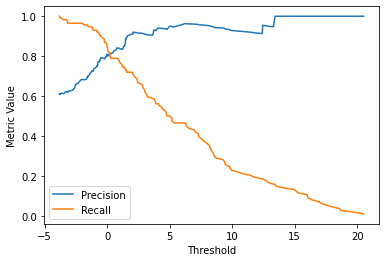

In [ ]:
plt.plot(thresholds,precision[:-1], label = "Precision")
plt.plot(thresholds,recall[:-1], label ="Recall")
plt.ylabel("Metric Value")
plt.xlabel("Threshold")
plt.legend()
plt.show()

# p3.9: Plot precision_vs_recall plot

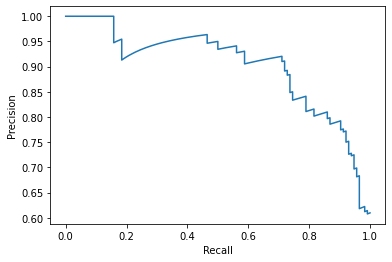

In [ ]:
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

# p3.10:plot the ROC curve
you should first use the roc_curve() function to compute the TPR and FPR for various threshold values:

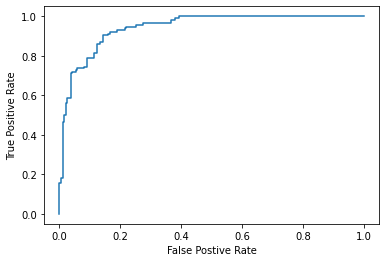

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(y_train, y_scores)

plt.plot(fpr, tpr)
plt.xlabel("False Postive Rate")
plt.ylabel('True Positive Rate')
plt.show()

# p3.11: Compute AUC score and show the result

In [ ]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, y_scores)
print("AUC: ", auc)

AUC:  0.9426994906621392
